In [1]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='ignore')
import pickle

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import sklearn.svm as svm
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization

from xgboost import plot_importance
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [46]:
sub100 = pd.read_csv('/Users/kimminyoung/Desktop/Dacon_SmartFactory/t30_XGB_sep_LINEdata_com.csv')
sub100

,PRODUCT_ID,Y_Class
0,TEST_000,NaN
1,TEST_001,1.0
2,TEST_002,1.0
3,TEST_003,1.0
4,TEST_004,1.0
...,...,...
305,TEST_305,NaN
306,TEST_306,1.0
307,TEST_307,NaN
308,TEST_308,NaN


In [78]:
import sys   
!{sys.executable} -m pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [2]:
def seed_everything(seed):
    random.seed(seed) #파이썬 자체 모듈 random 모듈의 시드 고정
    os.environ['PYTHONHASHSEED'] = str(seed) 
    np.random.seed(seed)
    
seed_everything(37) # Seed 고정

# Data Load

In [3]:
#데이터프레임 불러오기
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [4]:
sub1 = pd.read_csv('./sample_submission.csv')
sub2 = pd.read_csv('./sample_submission.csv')
sub3= pd.read_csv('./sample_submission.csv')
sub4= pd.read_csv('./sample_submission.csv')

In [39]:
sub5 = pd.read_csv('./sample_submission.csv')
sub6 = pd.read_csv('./sample_submission.csv')
sub7= pd.read_csv('./sample_submission.csv')
sub8= pd.read_csv('./sample_submission.csv')

In [56]:
sub9 = pd.read_csv('./sample_submission.csv')
sub10 = pd.read_csv('./sample_submission.csv')
sub11= pd.read_csv('./sample_submission.csv')
sub12= pd.read_csv('./sample_submission.csv')

In [41]:
sub13 = pd.read_csv('./sample_submission.csv')
sub14 = pd.read_csv('./sample_submission.csv')
sub15= pd.read_csv('./sample_submission.csv')
sub16= pd.read_csv('./sample_submission.csv')

# Data Preprocessing

PRODUCT_CODE 데이터 나누기

1.train_df

In [86]:
train_dfa = train_df[train_df['PRODUCT_CODE']=='A_31'] #249
train_dft = train_df[train_df['PRODUCT_CODE']=='T_31'] #343
train_dfo = train_df[train_df['PRODUCT_CODE']=='O_31'] #6

In [98]:
train_dfa['X_1228'][(train_dfa['Y_Class']==1) & (train_dfa['LINE']=='T050304')].mean()

73.02702702702703

In [87]:
#PRODUCT_CODE 별로 이 함수 이용
def fill_nan(df): #미디언으로 해주는 이유는 yclass가 0인건 55 1인건 59 이런 식으로 규칙이 존재하기 때문에 함부로 평균을 내면 안될 것 같음
    for col in df.columns[-2875:]: #X_1 ~ X_1531 , -1345
        #모두 결측치 인 경우 채우지 않는다.
        #T050 라인만 측정된 경우, 냅두기
        #T010 라인만 측정된 경우, 냅두기

        if df[col].isnull().sum() == len(df): #모든 value가 결측치인 행 null 249개, 343개, 6개
            continue
            
        elif len(df) - df[col].isnull().sum() <= 10: #너무 적은 개수만큼 측정되었다면, 그냥 채우지 않기 train_df_o의 경우 x
            continue
            
        elif df[col].isnull().sum() == 0: #모든 값이 다 측정된 경우 null 0개
            continue
            
        elif df[col].isnull().sum() < len(df): #T050이나 T010라인만 측정된 경우 어차피 값이 들어가지 않을 것임.
            nan_lst = list(df[df[col].isnull()==True].index)
            print(f'{col}')
            for j in nan_lst:
                yc = df['Y_Class'][j]
                line = df['LINE'][j]
                val = df[col][(df['Y_Class']==yc) & (df['LINE']==line)].median()
                df[col][j] = val
#                 print(f'df[col][j]에 들어가는 값은 {df[col][j]}')
        
    return df

In [88]:
start = time.time()
train_dfaf = fill_nan(train_dfa)
train_dftf = fill_nan(train_dft)
end = time.time()
print(f'time elapsed: {end-start}')

X_128
X_129
X_130
X_131
X_132
X_133
X_134
X_135
X_136
X_137
X_138
X_139
X_140
X_141
X_142
X_143
X_144
X_145
X_146
X_147
X_148
X_149
X_150
X_151
X_152
X_153
X_154
X_155
X_156
X_157
X_158
X_159
X_160
X_161
X_162
X_163
X_164
X_165
X_166
X_167
X_168
X_169
X_170
X_171
X_172
X_173
X_174
X_175
X_176
X_177
X_178
X_179
X_180
X_181
X_182
X_183
X_184
X_185
X_186
X_187
X_188
X_189
X_190
X_191
X_192
X_193
X_194
X_195
X_196
X_197
X_198
X_199
X_200
X_201
X_202
X_203
X_204
X_205
X_206
X_207
X_208
X_209
X_210
X_211
X_212
X_213
X_214
X_215
X_216
X_217
X_218
X_219
X_220
X_221
X_222
X_223
X_224
X_225
X_226
X_227
X_228
X_229
X_230
X_231
X_232
X_233
X_234
X_235
X_236
X_237
X_238
X_239
X_240
X_241
X_242
X_243
X_244
X_245
X_246
X_247
X_248
X_249
X_250
X_251
X_252
X_253
X_254
X_255
X_256
X_257
X_258
X_259
X_260
X_261
X_262
X_263
X_264
X_265
X_266
X_267
X_268
X_269
X_270
X_271
X_272
X_273
X_274
X_275
X_276
X_277
X_278
X_279
X_280
X_281
X_282
X_283
X_285
X_286
X_287
X_288
X_289
X_290
X_291
X_292
X_293
X_294
X_29

X_2126
X_2127
X_2128
X_2129
X_2130
X_2131
X_2132
X_2133
X_2134
X_2135
X_2136
X_2137
X_2138
X_2139
X_2140
X_2141
X_2142
X_2143
X_2144
X_2145
X_2146
X_2147
X_2148
X_2149
X_2150
X_2151
X_2152
X_2153
X_2154
X_2155
X_2156
X_2157
X_2158
X_2159
X_2160
X_2161
X_2162
X_2163
X_2164
X_2165
X_2166
X_2167
X_2168
X_2169
X_2170
X_2171
X_2172
X_2173
X_2174
X_2175
X_2176
X_2177
X_2178
X_2179
X_2180
X_2181
X_2182
X_2183
X_2184
X_2185
X_2186
X_2187
X_2188
X_2189
X_2190
X_2191
X_2192
X_2193
X_2194
X_2195
X_2196
X_2197
X_2198
X_2199
X_2200
X_2201
X_2202
X_2203
X_2204
X_2205
X_2206
X_2207
X_2208
X_2209
X_2210
X_2211
X_2212
X_2213
X_2214
X_2215
X_2216
X_2217
X_2218
X_2219
X_2220
X_2221
X_2222
X_2223
X_2224
X_2225
X_2226
X_2227
X_2228
X_2229
X_2230
X_2231
X_2232
X_2233
X_2234
X_2235
X_2236
X_2237
X_2238
X_2239
X_2240
X_2241
X_2242
X_2243
X_2244
X_2245
X_2246
X_2247
X_2248
X_2249
X_2250
X_2251
X_2252
X_2253
X_2254
X_2255
X_2256
X_2257
X_2258
X_2259
X_2260
X_2261
X_2262
X_2263
X_2264
X_2265
X_2266
X_2267
X_2268

In [89]:
train_dfof = fill_nan(train_dfo)
train_dfof

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
569,TRAIN_569,1,0.530533,2022-09-03 18:32,T100304,O_31,4.0,98.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570,TRAIN_570,2,0.534951,2022-09-03 18:40,T100306,O_31,6.0,90.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
571,TRAIN_571,1,0.525916,2022-09-03 18:48,T100304,O_31,4.0,100.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,TRAIN_572,2,0.535205,2022-09-03 18:56,T100306,O_31,6.0,89.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,TRAIN_597,1,0.533702,2022-09-08 14:46,T100306,O_31,21.0,87.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
train_df = pd.concat([train_dfaf, train_dftf, train_dfof], axis = 0)
train_df = train_df.sort_index(ascending=True)

### Feature Selection

outlier 이상체 제거한 최종 데이터 프레임 저장하기 & 모든 value가 결측치이거나 0.0인 행 지운 test data도 저장하기

In [91]:
train_df.to_csv('./train_fillnan_t28_med.csv', index = False) 

In [154]:
# test_df.to_csv('./test_fillnan_t23.csv', index = False) #traindf의 수치데이터를 testdf에 다시 적용해 전처리

모델링을 하기 앞서, 독립변수 X와 종속변수 y를 설정해야한다.

**학습에 사용할 변수 X와 예측할 변수 y를 분리**

In [4]:
train_y = train_df['Y_Class']

학습에 쓰이지 않을 column들을 제거한다.

In [5]:
train_x = train_df.drop(columns = ['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
#모델 학습이 끝나고 예측에 쓰일 test데이터
test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

범주형 데이터를 수치 데이터로 전환하기 위해 LabelEncoder 활용

In [6]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i]) #원래 column 값을 기준으로 fit.
    train_x[i] = le.transform(train_x[i]) #수치화, 수치로 변형

    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [112]:
test_x.isnull().sum()[test_x.isnull().sum() > 0]

X_2628    12
X_2629    12
X_2630    12
X_2631    12
X_2632    12
          ..
X_2696    12
X_2697    12
X_2698    12
X_2699    12
X_2844    12
Length: 73, dtype: int64

### Modeling

1.모델 선택 - sklearn라이브러리 활용 - RandomForest 

2.모델 학습 - train_df를 활용하여 1번에서 정의한 모델로 학습

3.예측 - 학습된 모델을 바탕으로 test 데이터를 예측

4.정답 파일 생성 - 정답 파일 생성 및 제출 필요(경진대회를 위해 필요한 과정.)

subRF_r = pd.read_csv('./sample_submission.csv')
subXGB_r = pd.read_csv('./sample_submission.csv')
sub_v = pd.read_csv('./sample_submission.csv')

학습용과 테스트용 데이터 세트를 위해 별도의 Dmatrix를 생성

In [8]:
import xgboost as xgb #파이썬 래퍼
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
dtest_x = xgb.DMatrix(data=test_x)

params = {'max_depth' : 3,
          'eta': 0.08,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':100
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[11:37:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.03552	eval-mlogloss:1.04489
[1]	train-mlogloss:0.97899	eval-mlogloss:0.99571
[2]	train-mlogloss:0.92907	eval-mlogloss:0.95411
[3]	train-mlogloss:0.88491	eval-mlogloss:0.91816
[4]	train-mlogloss:0.84486	eval-mlogloss:0.88332
[5]	train-mlogloss:0.80793	eval-mlogloss:0.85553
[6]	train-mlogloss:0.77674	eval-mlogloss:0.82827
[7]	train-mlogloss:0.74706	eval-mlogloss:0.80882
[8]	train-mlogloss:0.72137	eval-mlogloss:0.78854
[9]	train-mlogloss:0.69726	eval-mlogloss:0.77401
[10]	train-mlogloss:0.67528	eval-mlog

[154]	train-mlogloss:0.10650	eval-mlogloss:0.55929
[155]	train-mlogloss:0.10551	eval-mlogloss:0.55943
[156]	train-mlogloss:0.10447	eval-mlogloss:0.55980
[157]	train-mlogloss:0.10370	eval-mlogloss:0.55835
[158]	train-mlogloss:0.10263	eval-mlogloss:0.55864
[159]	train-mlogloss:0.10136	eval-mlogloss:0.55933
[160]	train-mlogloss:0.10035	eval-mlogloss:0.56040
[161]	train-mlogloss:0.09948	eval-mlogloss:0.56150
[162]	train-mlogloss:0.09875	eval-mlogloss:0.56009
[163]	train-mlogloss:0.09775	eval-mlogloss:0.56085
[164]	train-mlogloss:0.09655	eval-mlogloss:0.56176
[165]	train-mlogloss:0.09549	eval-mlogloss:0.56022
[166]	train-mlogloss:0.09462	eval-mlogloss:0.56016
[167]	train-mlogloss:0.09365	eval-mlogloss:0.56018
[168]	train-mlogloss:0.09283	eval-mlogloss:0.56087
[169]	train-mlogloss:0.09188	eval-mlogloss:0.56165
[170]	train-mlogloss:0.09077	eval-mlogloss:0.56223
[171]	train-mlogloss:0.08995	eval-mlogloss:0.56301
[172]	train-mlogloss:0.08908	eval-mlogloss:0.56336
[173]	train-mlogloss:0.08835	ev

In [159]:
pred_probs = xgb_model.predict(dtest)
# np.round(pred_probs).astype(int)
pred_probs

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'pandas.core.frame.DataFrame'>)

In [118]:
import xgboost as xgb #1.58853
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 6,
          'eta': 0.05,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':100
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[13:21:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.05003	eval-mlogloss:1.06058
[1]	train-mlogloss:1.00522	eval-mlogloss:1.02867
[2]	train-mlogloss:0.96328	eval-mlogloss:0.99705
[3]	train-mlogloss:0.92357	eval-mlogloss:0.96873
[4]	train-mlogloss:0.88729	eval-mlogloss:0.94265
[5]	train-mlogloss:0.85310	eval-mlogloss:0.91728
[6]	train-mlogloss:0.82176	eval-mlogloss:0.89385
[7]	train-mlogloss:0.79275	eval-mlogloss:0.87155
[8]	train-mlogloss:0.76537	eval-mlogloss:0.85189
[9]	train-mlogloss:0.73825	eval-mlogloss:0.83452
[10]	train-mlogloss:0.71390	eval-mlog

[154]	train-mlogloss:0.04536	eval-mlogloss:0.59811
[155]	train-mlogloss:0.04484	eval-mlogloss:0.59807
[156]	train-mlogloss:0.04424	eval-mlogloss:0.59877
[157]	train-mlogloss:0.04373	eval-mlogloss:0.59833
[158]	train-mlogloss:0.04323	eval-mlogloss:0.59908
[159]	train-mlogloss:0.04272	eval-mlogloss:0.59977
[160]	train-mlogloss:0.04221	eval-mlogloss:0.60035
[161]	train-mlogloss:0.04170	eval-mlogloss:0.60133
[162]	train-mlogloss:0.04121	eval-mlogloss:0.60197
[163]	train-mlogloss:0.04077	eval-mlogloss:0.60176
[164]	train-mlogloss:0.04029	eval-mlogloss:0.60143
[165]	train-mlogloss:0.03991	eval-mlogloss:0.60138
[166]	train-mlogloss:0.03949	eval-mlogloss:0.60206
[167]	train-mlogloss:0.03900	eval-mlogloss:0.60158
[168]	train-mlogloss:0.03845	eval-mlogloss:0.60201
[169]	train-mlogloss:0.03805	eval-mlogloss:0.60176
[170]	train-mlogloss:0.03766	eval-mlogloss:0.60196
[171]	train-mlogloss:0.03723	eval-mlogloss:0.60218
[172]	train-mlogloss:0.03675	eval-mlogloss:0.60312
[173]	train-mlogloss:0.03639	ev

In [119]:
print(xgb_model.best_iteration)
print(xgb_model.best_ntree_limit)
print(xgb_model.best_score)

112
113
0.5885293905002376


In [10]:
pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
preds = np.round(pred_probs).astype(int)
preds

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨


array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
sub1['Y_Class'] = preds
sub1.to_csv('./t30_XGB_Dmatrix_Earlystopping.csv', index = False)

In [116]:
import xgboost as xgb #2.59826
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 6,
          'eta': 0.08,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':100
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[13:20:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.02171	eval-mlogloss:1.03851
[1]	train-mlogloss:0.95326	eval-mlogloss:0.98923
[2]	train-mlogloss:0.89156	eval-mlogloss:0.94718
[3]	train-mlogloss:0.83758	eval-mlogloss:0.90821
[4]	train-mlogloss:0.78871	eval-mlogloss:0.87200
[5]	train-mlogloss:0.74569	eval-mlogloss:0.84096
[6]	train-mlogloss:0.70620	eval-mlogloss:0.81450
[7]	train-mlogloss:0.67075	eval-mlogloss:0.79110
[8]	train-mlogloss:0.63479	eval-mlogloss:0.77257
[9]	train-mlogloss:0.60253	eval-mlogloss:0.75979
[10]	train-mlogloss:0.57219	eval-mlog

[154]	train-mlogloss:0.01917	eval-mlogloss:0.63383
[155]	train-mlogloss:0.01898	eval-mlogloss:0.63475
[156]	train-mlogloss:0.01876	eval-mlogloss:0.63541
[157]	train-mlogloss:0.01856	eval-mlogloss:0.63537
[158]	train-mlogloss:0.01837	eval-mlogloss:0.63646
[159]	train-mlogloss:0.01819	eval-mlogloss:0.63673
[160]	train-mlogloss:0.01800	eval-mlogloss:0.63724
[161]	train-mlogloss:0.01782	eval-mlogloss:0.63811
[162]	train-mlogloss:0.01766	eval-mlogloss:0.64059
[163]	train-mlogloss:0.01749	eval-mlogloss:0.64053
[164]	train-mlogloss:0.01733	eval-mlogloss:0.63964
[165]	train-mlogloss:0.01718	eval-mlogloss:0.64015
[166]	train-mlogloss:0.01701	eval-mlogloss:0.64169
[167]	train-mlogloss:0.01686	eval-mlogloss:0.64249
[168]	train-mlogloss:0.01671	eval-mlogloss:0.64287
[169]	train-mlogloss:0.01656	eval-mlogloss:0.64272
[170]	train-mlogloss:0.01642	eval-mlogloss:0.64271
[171]	train-mlogloss:0.01627	eval-mlogloss:0.64398
[172]	train-mlogloss:0.01612	eval-mlogloss:0.64434
[173]	train-mlogloss:0.01599	ev

In [117]:
print(xgb_model.best_iteration)
print(xgb_model.best_ntree_limit)
print(xgb_model.best_score)

95
96
0.5964751899203596


In [120]:
import xgboost as xgb #3.61664 ######################
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.18, 
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 6,
          'eta': 0.05,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':100
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[13:23:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.04916	eval-mlogloss:1.06032
[1]	train-mlogloss:1.00358	eval-mlogloss:1.02647
[2]	train-mlogloss:0.96153	eval-mlogloss:0.99485
[3]	train-mlogloss:0.92193	eval-mlogloss:0.96778
[4]	train-mlogloss:0.88512	eval-mlogloss:0.94253
[5]	train-mlogloss:0.85097	eval-mlogloss:0.91944
[6]	train-mlogloss:0.81911	eval-mlogloss:0.89793
[7]	train-mlogloss:0.78908	eval-mlogloss:0.87794
[8]	train-mlogloss:0.76020	eval-mlogloss:0.85865
[9]	train-mlogloss:0.73448	eval-mlogloss:0.84087
[10]	train-mlogloss:0.71006	eval-mlog

[154]	train-mlogloss:0.04463	eval-mlogloss:0.63988
[155]	train-mlogloss:0.04404	eval-mlogloss:0.64001
[156]	train-mlogloss:0.04356	eval-mlogloss:0.64018
[157]	train-mlogloss:0.04309	eval-mlogloss:0.64031
[158]	train-mlogloss:0.04258	eval-mlogloss:0.64002
[159]	train-mlogloss:0.04206	eval-mlogloss:0.63992
[160]	train-mlogloss:0.04154	eval-mlogloss:0.64000
[161]	train-mlogloss:0.04106	eval-mlogloss:0.63975
[162]	train-mlogloss:0.04053	eval-mlogloss:0.63968
[163]	train-mlogloss:0.04002	eval-mlogloss:0.63942
[164]	train-mlogloss:0.03953	eval-mlogloss:0.64051
[165]	train-mlogloss:0.03900	eval-mlogloss:0.64118
[166]	train-mlogloss:0.03853	eval-mlogloss:0.64109
[167]	train-mlogloss:0.03808	eval-mlogloss:0.64159
[168]	train-mlogloss:0.03769	eval-mlogloss:0.64149
[169]	train-mlogloss:0.03724	eval-mlogloss:0.64146
[170]	train-mlogloss:0.03681	eval-mlogloss:0.64153
[171]	train-mlogloss:0.03635	eval-mlogloss:0.64217
[172]	train-mlogloss:0.03597	eval-mlogloss:0.64250
[173]	train-mlogloss:0.03555	ev

In [122]:
pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(pred_probs).astype(int)
sub11['Y_Class'] = preds
sub11.to_csv('./t30_XGB_Dmatrix_Earlystopping_eta005_testsize018_maxdepth6.csv', index = False)

In [130]:
pred_probs = xgb_model.predict(dtest_x, iteration_range=(90,100))
preds2 = np.round(pred_probs).astype(int)
sub12['Y_Class'] = preds
sub12.to_csv('./t30_XGB_Dmatrix_Earlystopping_eta005_testsize018_maxdepth6_setiteration.csv', index = False)

In [123]:
sub11.describe()

,Y_Class
count,310.000000
mean,0.877419
std,0.374520
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [131]:
sub12.describe()

,Y_Class
count,310.000000
mean,0.877419
std,0.374520
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [121]:
print(xgb_model.best_iteration)
print(xgb_model.best_ntree_limit)
print(xgb_model.best_score)

84
85
0.6152859414686207


In [112]:
import xgboost as xgb #4.53721
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, 
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 6,
          'eta': 0.05,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':100
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[13:19:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.04962	eval-mlogloss:1.06107
[1]	train-mlogloss:1.00421	eval-mlogloss:1.02604
[2]	train-mlogloss:0.96150	eval-mlogloss:0.99512
[3]	train-mlogloss:0.92262	eval-mlogloss:0.96747
[4]	train-mlogloss:0.88667	eval-mlogloss:0.93836
[5]	train-mlogloss:0.85271	eval-mlogloss:0.91080
[6]	train-mlogloss:0.82139	eval-mlogloss:0.88488
[7]	train-mlogloss:0.79095	eval-mlogloss:0.86038
[8]	train-mlogloss:0.76327	eval-mlogloss:0.83922
[9]	train-mlogloss:0.73715	eval-mlogloss:0.81755
[10]	train-mlogloss:0.71271	eval-mlog

[154]	train-mlogloss:0.05253	eval-mlogloss:0.55327
[155]	train-mlogloss:0.05184	eval-mlogloss:0.55277
[156]	train-mlogloss:0.05116	eval-mlogloss:0.55268
[157]	train-mlogloss:0.05057	eval-mlogloss:0.55248
[158]	train-mlogloss:0.04995	eval-mlogloss:0.55284
[159]	train-mlogloss:0.04946	eval-mlogloss:0.55285
[160]	train-mlogloss:0.04892	eval-mlogloss:0.55290
[161]	train-mlogloss:0.04846	eval-mlogloss:0.55307
[162]	train-mlogloss:0.04788	eval-mlogloss:0.55355
[163]	train-mlogloss:0.04739	eval-mlogloss:0.55471
[164]	train-mlogloss:0.04687	eval-mlogloss:0.55531
[165]	train-mlogloss:0.04640	eval-mlogloss:0.55488
[166]	train-mlogloss:0.04582	eval-mlogloss:0.55463
[167]	train-mlogloss:0.04531	eval-mlogloss:0.55455


In [113]:
print(xgb_model.best_iteration)
print(xgb_model.best_ntree_limit)
print(xgb_model.best_score)

67
68
0.537209142309924


In [110]:
import xgboost as xgb #5.54005
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, 
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 6,
          'eta': 0.01,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':100
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[13:18:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.08868	eval-mlogloss:1.09099
[1]	train-mlogloss:1.07885	eval-mlogloss:1.08349
[2]	train-mlogloss:1.06925	eval-mlogloss:1.07627
[3]	train-mlogloss:1.05975	eval-mlogloss:1.06856
[4]	train-mlogloss:1.05045	eval-mlogloss:1.06172
[5]	train-mlogloss:1.04123	eval-mlogloss:1.05401
[6]	train-mlogloss:1.03221	eval-mlogloss:1.04809
[7]	train-mlogloss:1.02332	eval-mlogloss:1.04137
[8]	train-mlogloss:1.01452	eval-mlogloss:1.03429
[9]	train-mlogloss:1.00565	eval-mlogloss:1.02698
[10]	train-mlogloss:0.99716	eval-mlog

[154]	train-mlogloss:0.39381	eval-mlogloss:0.60043
[155]	train-mlogloss:0.39137	eval-mlogloss:0.59957
[156]	train-mlogloss:0.38896	eval-mlogloss:0.59887
[157]	train-mlogloss:0.38669	eval-mlogloss:0.59850
[158]	train-mlogloss:0.38434	eval-mlogloss:0.59818
[159]	train-mlogloss:0.38199	eval-mlogloss:0.59740
[160]	train-mlogloss:0.37982	eval-mlogloss:0.59694
[161]	train-mlogloss:0.37765	eval-mlogloss:0.59639
[162]	train-mlogloss:0.37546	eval-mlogloss:0.59571
[163]	train-mlogloss:0.37334	eval-mlogloss:0.59510
[164]	train-mlogloss:0.37115	eval-mlogloss:0.59424
[165]	train-mlogloss:0.36908	eval-mlogloss:0.59375
[166]	train-mlogloss:0.36704	eval-mlogloss:0.59303
[167]	train-mlogloss:0.36484	eval-mlogloss:0.59219
[168]	train-mlogloss:0.36281	eval-mlogloss:0.59138
[169]	train-mlogloss:0.36062	eval-mlogloss:0.59087
[170]	train-mlogloss:0.35864	eval-mlogloss:0.59044
[171]	train-mlogloss:0.35675	eval-mlogloss:0.58977
[172]	train-mlogloss:0.35476	eval-mlogloss:0.58906
[173]	train-mlogloss:0.35262	ev

[315]	train-mlogloss:0.18859	eval-mlogloss:0.54013
[316]	train-mlogloss:0.18795	eval-mlogloss:0.54019
[317]	train-mlogloss:0.18730	eval-mlogloss:0.54036
[318]	train-mlogloss:0.18670	eval-mlogloss:0.54014
[319]	train-mlogloss:0.18599	eval-mlogloss:0.54005
[320]	train-mlogloss:0.18536	eval-mlogloss:0.54027
[321]	train-mlogloss:0.18478	eval-mlogloss:0.54041
[322]	train-mlogloss:0.18404	eval-mlogloss:0.54079
[323]	train-mlogloss:0.18343	eval-mlogloss:0.54055
[324]	train-mlogloss:0.18289	eval-mlogloss:0.54078
[325]	train-mlogloss:0.18231	eval-mlogloss:0.54063
[326]	train-mlogloss:0.18168	eval-mlogloss:0.54076
[327]	train-mlogloss:0.18106	eval-mlogloss:0.54090
[328]	train-mlogloss:0.18048	eval-mlogloss:0.54089
[329]	train-mlogloss:0.17980	eval-mlogloss:0.54114
[330]	train-mlogloss:0.17928	eval-mlogloss:0.54104
[331]	train-mlogloss:0.17865	eval-mlogloss:0.54114
[332]	train-mlogloss:0.17813	eval-mlogloss:0.54116
[333]	train-mlogloss:0.17753	eval-mlogloss:0.54144
[334]	train-mlogloss:0.17699	ev

In [111]:
print(xgb_model.best_iteration)
print(xgb_model.best_ntree_limit)
print(xgb_model.best_score)

319
320
0.5400549212470651


In [108]:
import xgboost as xgb #6.53917################################
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, 
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 6,
          'eta': 0.03,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':100
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[13:17:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.06901	eval-mlogloss:1.07591
[1]	train-mlogloss:1.04069	eval-mlogloss:1.05383
[2]	train-mlogloss:1.01375	eval-mlogloss:1.03506
[3]	train-mlogloss:0.98793	eval-mlogloss:1.01443
[4]	train-mlogloss:0.96290	eval-mlogloss:0.99652
[5]	train-mlogloss:0.93883	eval-mlogloss:0.97894
[6]	train-mlogloss:0.91622	eval-mlogloss:0.96019
[7]	train-mlogloss:0.89472	eval-mlogloss:0.94282
[8]	train-mlogloss:0.87389	eval-mlogloss:0.92560
[9]	train-mlogloss:0.85401	eval-mlogloss:0.90970
[10]	train-mlogloss:0.83471	eval-mlog

[154]	train-mlogloss:0.11604	eval-mlogloss:0.53973
[155]	train-mlogloss:0.11522	eval-mlogloss:0.53993
[156]	train-mlogloss:0.11436	eval-mlogloss:0.54017
[157]	train-mlogloss:0.11341	eval-mlogloss:0.54025
[158]	train-mlogloss:0.11240	eval-mlogloss:0.54069
[159]	train-mlogloss:0.11161	eval-mlogloss:0.54129
[160]	train-mlogloss:0.11048	eval-mlogloss:0.54088
[161]	train-mlogloss:0.10962	eval-mlogloss:0.54033
[162]	train-mlogloss:0.10867	eval-mlogloss:0.54049
[163]	train-mlogloss:0.10787	eval-mlogloss:0.54099
[164]	train-mlogloss:0.10662	eval-mlogloss:0.54072
[165]	train-mlogloss:0.10587	eval-mlogloss:0.54038
[166]	train-mlogloss:0.10500	eval-mlogloss:0.54130
[167]	train-mlogloss:0.10413	eval-mlogloss:0.54060
[168]	train-mlogloss:0.10333	eval-mlogloss:0.54090
[169]	train-mlogloss:0.10242	eval-mlogloss:0.54133
[170]	train-mlogloss:0.10148	eval-mlogloss:0.54073
[171]	train-mlogloss:0.10061	eval-mlogloss:0.54058
[172]	train-mlogloss:0.09992	eval-mlogloss:0.54105
[173]	train-mlogloss:0.09921	ev

In [109]:
print(xgb_model.best_iteration)
print(xgb_model.best_ntree_limit)
print(xgb_model.best_score)

114
115
0.5391664906715353


In [22]:
import xgboost as xgb #7.53219
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, 
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 6,
          'eta': 0.04,
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':100
          }
num_rounds = 500

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[14:09:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.05928	eval-mlogloss:1.06846
[1]	train-mlogloss:1.02224	eval-mlogloss:1.03964
[2]	train-mlogloss:0.98753	eval-mlogloss:1.01551
[3]	train-mlogloss:0.95449	eval-mlogloss:0.99104
[4]	train-mlogloss:0.92392	eval-mlogloss:0.96798
[5]	train-mlogloss:0.89469	eval-mlogloss:0.94454
[6]	train-mlogloss:0.86730	eval-mlogloss:0.92149
[7]	train-mlogloss:0.84109	eval-mlogloss:0.90036
[8]	train-mlogloss:0.81629	eval-mlogloss:0.88033
[9]	train-mlogloss:0.79239	eval-mlogloss:0.85956
[10]	train-mlogloss:0.77003	eval-mlog

[154]	train-mlogloss:0.07586	eval-mlogloss:0.53859
[155]	train-mlogloss:0.07515	eval-mlogloss:0.53809
[156]	train-mlogloss:0.07432	eval-mlogloss:0.53885
[157]	train-mlogloss:0.07356	eval-mlogloss:0.53911
[158]	train-mlogloss:0.07286	eval-mlogloss:0.53812
[159]	train-mlogloss:0.07214	eval-mlogloss:0.53908
[160]	train-mlogloss:0.07149	eval-mlogloss:0.53970
[161]	train-mlogloss:0.07085	eval-mlogloss:0.53975
[162]	train-mlogloss:0.07019	eval-mlogloss:0.53901
[163]	train-mlogloss:0.06951	eval-mlogloss:0.54001
[164]	train-mlogloss:0.06887	eval-mlogloss:0.53961
[165]	train-mlogloss:0.06811	eval-mlogloss:0.53860
[166]	train-mlogloss:0.06752	eval-mlogloss:0.53814
[167]	train-mlogloss:0.06689	eval-mlogloss:0.53932
[168]	train-mlogloss:0.06617	eval-mlogloss:0.53933
[169]	train-mlogloss:0.06552	eval-mlogloss:0.53895
[170]	train-mlogloss:0.06484	eval-mlogloss:0.54014
[171]	train-mlogloss:0.06418	eval-mlogloss:0.54057
[172]	train-mlogloss:0.06358	eval-mlogloss:0.54042
[173]	train-mlogloss:0.06300	ev

[315]	train-mlogloss:0.02093	eval-mlogloss:0.54410
[316]	train-mlogloss:0.02081	eval-mlogloss:0.54365
[317]	train-mlogloss:0.02069	eval-mlogloss:0.54398
[318]	train-mlogloss:0.02057	eval-mlogloss:0.54417
[319]	train-mlogloss:0.02046	eval-mlogloss:0.54401
[320]	train-mlogloss:0.02032	eval-mlogloss:0.54399
[321]	train-mlogloss:0.02021	eval-mlogloss:0.54419
[322]	train-mlogloss:0.02008	eval-mlogloss:0.54423
[323]	train-mlogloss:0.01996	eval-mlogloss:0.54414
[324]	train-mlogloss:0.01986	eval-mlogloss:0.54493
[325]	train-mlogloss:0.01975	eval-mlogloss:0.54569
[326]	train-mlogloss:0.01964	eval-mlogloss:0.54517
[327]	train-mlogloss:0.01953	eval-mlogloss:0.54511
[328]	train-mlogloss:0.01941	eval-mlogloss:0.54523
[329]	train-mlogloss:0.01930	eval-mlogloss:0.54519
[330]	train-mlogloss:0.01919	eval-mlogloss:0.54543
[331]	train-mlogloss:0.01908	eval-mlogloss:0.54578
[332]	train-mlogloss:0.01897	eval-mlogloss:0.54608
[333]	train-mlogloss:0.01888	eval-mlogloss:0.54614
[334]	train-mlogloss:0.01877	ev

[476]	train-mlogloss:0.01113	eval-mlogloss:0.58978
[477]	train-mlogloss:0.01110	eval-mlogloss:0.59043
[478]	train-mlogloss:0.01108	eval-mlogloss:0.59066
[479]	train-mlogloss:0.01105	eval-mlogloss:0.59116
[480]	train-mlogloss:0.01102	eval-mlogloss:0.59145
[481]	train-mlogloss:0.01099	eval-mlogloss:0.59163
[482]	train-mlogloss:0.01096	eval-mlogloss:0.59213
[483]	train-mlogloss:0.01094	eval-mlogloss:0.59204
[484]	train-mlogloss:0.01092	eval-mlogloss:0.59244
[485]	train-mlogloss:0.01089	eval-mlogloss:0.59301
[486]	train-mlogloss:0.01087	eval-mlogloss:0.59321
[487]	train-mlogloss:0.01084	eval-mlogloss:0.59318
[488]	train-mlogloss:0.01082	eval-mlogloss:0.59358
[489]	train-mlogloss:0.01079	eval-mlogloss:0.59391
[490]	train-mlogloss:0.01076	eval-mlogloss:0.59428
[491]	train-mlogloss:0.01074	eval-mlogloss:0.59435
[492]	train-mlogloss:0.01071	eval-mlogloss:0.59458
[493]	train-mlogloss:0.01069	eval-mlogloss:0.59452
[494]	train-mlogloss:0.01066	eval-mlogloss:0.59457
[495]	train-mlogloss:0.01063	ev

In [25]:
xgb_model.best_ntree_limit

138

In [24]:
dtest_x = xgb.DMatrix(data=test_x)
pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(pred_probs).astype(int)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
preds = pd.DataFrame(preds)
preds.describe()

,0
count,310.000000
mean,0.896774
std,0.353882
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [26]:
sub13 = pd.read_csv('/Users/kimminyoung/Desktop/Dacon_SmartFactory/t30_XGB_Dmatrix_Earlystopping_eta004_testsize01(0.683).csv')
sub13.describe()

,Y_Class
count,310.000000
mean,0.896774
std,0.353882
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [28]:
pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(pred_probs).astype(int)
sub2['Y_Class'] = preds
sub2.to_csv('./t30_XGB_Dmatrix_Earlystopping_eta004_testsize01.csv', index = False)

In [103]:
print(xgb_model.best_iteration)
print(xgb_model.best_ntree_limit)
print(xgb_model.best_score)

137
138
0.5321924893185497


In [100]:
import xgboost as xgb #8.53219
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, #최적
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 6,
          'eta': 0.04, #최적
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':200 #early_stopping 200으로 해도 별 차이 없음.
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[13:13:52] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.05928	eval-mlogloss:1.06846
[1]	train-mlogloss:1.02224	eval-mlogloss:1.03964
[2]	train-mlogloss:0.98753	eval-mlogloss:1.01551
[3]	train-mlogloss:0.95449	eval-mlogloss:0.99104
[4]	train-mlogloss:0.92392	eval-mlogloss:0.96798
[5]	train-mlogloss:0.89469	eval-mlogloss:0.94454
[6]	train-mlogloss:0.86730	eval-mlogloss:0.92149
[7]	train-mlogloss:0.84109	eval-mlogloss:0.90036
[8]	train-mlogloss:0.81629	eval-mlogloss:0.88033
[9]	train-mlogloss:0.79239	eval-mlogloss:0.85956
[10]	train-mlogloss:0.77003	eval-mlog

[154]	train-mlogloss:0.07586	eval-mlogloss:0.53859
[155]	train-mlogloss:0.07515	eval-mlogloss:0.53809
[156]	train-mlogloss:0.07432	eval-mlogloss:0.53885
[157]	train-mlogloss:0.07356	eval-mlogloss:0.53911
[158]	train-mlogloss:0.07286	eval-mlogloss:0.53812
[159]	train-mlogloss:0.07214	eval-mlogloss:0.53908
[160]	train-mlogloss:0.07149	eval-mlogloss:0.53970
[161]	train-mlogloss:0.07085	eval-mlogloss:0.53975
[162]	train-mlogloss:0.07019	eval-mlogloss:0.53901
[163]	train-mlogloss:0.06951	eval-mlogloss:0.54001
[164]	train-mlogloss:0.06887	eval-mlogloss:0.53961
[165]	train-mlogloss:0.06811	eval-mlogloss:0.53860
[166]	train-mlogloss:0.06752	eval-mlogloss:0.53814
[167]	train-mlogloss:0.06689	eval-mlogloss:0.53932
[168]	train-mlogloss:0.06617	eval-mlogloss:0.53933
[169]	train-mlogloss:0.06552	eval-mlogloss:0.53895
[170]	train-mlogloss:0.06484	eval-mlogloss:0.54014
[171]	train-mlogloss:0.06418	eval-mlogloss:0.54057
[172]	train-mlogloss:0.06358	eval-mlogloss:0.54042
[173]	train-mlogloss:0.06300	ev

In [35]:
pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(pred_probs).astype(int)
sub4['Y_Class'] = preds
sub4.to_csv('./t30_XGB_Dmatrix_Earlystopping200_eta004_testsize01_.csv', index = False)

In [101]:
print(xgb_model.best_iteration)
print(xgb_model.best_ntree_limit)
print(xgb_model.best_score)

137
138
0.5321924893185497


In [25]:
import xgboost as xgb #merror 9.53219 #merror로 바꿔도 결과가 위와 같다.
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, #최적
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 6,
          'eta': 0.04, #최적
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'merror',
          'eval_set': [(X_test, y_test)],
          'early_stopping':200
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[11:56:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-merror:0.10409	eval-merror:0.20000
[1]	train-merror:0.08922	eval-merror:0.16667
[2]	train-merror:0.09108	eval-merror:0.16667
[3]	train-merror:0.09108	eval-merror:0.20000
[4]	train-merror:0.09108	eval-merror:0.20000
[5]	train-merror:0.08922	eval-merror:0.20000
[6]	train-merror:0.08736	eval-merror:0.20000
[7]	train-merror:0.08736	eval-merror:0.18333
[8]	train-merror:0.08922	eval-merror:0.18333
[9]	train-merror:0.09108	eval-merror:0.16667
[10]	train-merror:0.08550	eval-merror:0.16667
[11]	train-merror:0.08736	eval-

In [31]:
pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(pred_probs).astype(int)
sub3['Y_Class'] = preds
sub3.to_csv('./t30_XGB_Dmatrix_Earlystopping_eta004_testsize01_merror.csv', index = False)

In [39]:
import xgboost as xgb #10.51215
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, #최적
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' :3,
          'eta': 0.04, #최적
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':200 #early_stopping 200으로 해도 별 차이 없음.
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[15:14:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.06657	eval-mlogloss:1.06933
[1]	train-mlogloss:1.03715	eval-mlogloss:1.04356
[2]	train-mlogloss:1.00890	eval-mlogloss:1.02016
[3]	train-mlogloss:0.98252	eval-mlogloss:0.99579
[4]	train-mlogloss:0.95754	eval-mlogloss:0.97225
[5]	train-mlogloss:0.93398	eval-mlogloss:0.95144
[6]	train-mlogloss:0.91176	eval-mlogloss:0.93018
[7]	train-mlogloss:0.89104	eval-mlogloss:0.91326
[8]	train-mlogloss:0.87103	eval-mlogloss:0.89709
[9]	train-mlogloss:0.85213	eval-mlogloss:0.87863
[10]	train-mlogloss:0.83419	eval-mlog

[154]	train-mlogloss:0.25403	eval-mlogloss:0.57236
[155]	train-mlogloss:0.25277	eval-mlogloss:0.57198
[156]	train-mlogloss:0.25146	eval-mlogloss:0.57213
[157]	train-mlogloss:0.24997	eval-mlogloss:0.57289
[158]	train-mlogloss:0.24878	eval-mlogloss:0.57257
[159]	train-mlogloss:0.24725	eval-mlogloss:0.57172
[160]	train-mlogloss:0.24602	eval-mlogloss:0.57173
[161]	train-mlogloss:0.24460	eval-mlogloss:0.57277
[162]	train-mlogloss:0.24325	eval-mlogloss:0.57458
[163]	train-mlogloss:0.24206	eval-mlogloss:0.57416
[164]	train-mlogloss:0.24057	eval-mlogloss:0.57357
[165]	train-mlogloss:0.23947	eval-mlogloss:0.57298
[166]	train-mlogloss:0.23838	eval-mlogloss:0.57330
[167]	train-mlogloss:0.23710	eval-mlogloss:0.57339
[168]	train-mlogloss:0.23581	eval-mlogloss:0.57300
[169]	train-mlogloss:0.23458	eval-mlogloss:0.57201
[170]	train-mlogloss:0.23344	eval-mlogloss:0.57283
[171]	train-mlogloss:0.23231	eval-mlogloss:0.57345
[172]	train-mlogloss:0.23106	eval-mlogloss:0.57389
[173]	train-mlogloss:0.22995	ev

[315]	train-mlogloss:0.11919	eval-mlogloss:0.57087
[316]	train-mlogloss:0.11865	eval-mlogloss:0.56999
[317]	train-mlogloss:0.11817	eval-mlogloss:0.56949
[318]	train-mlogloss:0.11768	eval-mlogloss:0.57003
[319]	train-mlogloss:0.11724	eval-mlogloss:0.57014
[320]	train-mlogloss:0.11671	eval-mlogloss:0.57043
[321]	train-mlogloss:0.11626	eval-mlogloss:0.56943
[322]	train-mlogloss:0.11583	eval-mlogloss:0.57022
[323]	train-mlogloss:0.11525	eval-mlogloss:0.57019
[324]	train-mlogloss:0.11484	eval-mlogloss:0.56976
[325]	train-mlogloss:0.11420	eval-mlogloss:0.57063
[326]	train-mlogloss:0.11375	eval-mlogloss:0.57128
[327]	train-mlogloss:0.11325	eval-mlogloss:0.57109
[328]	train-mlogloss:0.11289	eval-mlogloss:0.57059
[329]	train-mlogloss:0.11250	eval-mlogloss:0.57009
[330]	train-mlogloss:0.11199	eval-mlogloss:0.57018
[331]	train-mlogloss:0.11146	eval-mlogloss:0.57037
[332]	train-mlogloss:0.11106	eval-mlogloss:0.57018
[333]	train-mlogloss:0.11052	eval-mlogloss:0.56982
[334]	train-mlogloss:0.11007	ev

In [43]:
pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(pred_probs).astype(int)
preds = pd.DataFrame(preds)
preds.describe()
# sub5['Y_Class'] = preds
# sub5.to_csv('./t30_XGB_Dmatrix_Earlystopping_eta004_testsize01_maxdepth7.csv', index = False)

,0
count,310.000000
mean,0.900000
std,0.331223
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [40]:
print(xgb_model.best_iteration)
print(xgb_model.best_ntree_limit)
print(xgb_model.best_score)

289
290
0.5671001533046365


In [44]:
pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(pred_probs).astype(int)
sub13['Y_Class'] = preds
sub13.to_csv('./t30_XGB_Dmatrix_Earlystopping_eta004_testsize01_maxdepth3.csv', index = False)

In [45]:
sub13.describe()

,Y_Class
count,310.000000
mean,0.900000
std,0.331223
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [106]:
import xgboost as xgb #11.50769
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, #최적
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 8,
          'eta': 0.04, 
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':200 #early_stopping 200으로 해도 별 차이 없음.
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[13:16:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.05624	eval-mlogloss:1.06595
[1]	train-mlogloss:1.01594	eval-mlogloss:1.03615
[2]	train-mlogloss:0.97846	eval-mlogloss:1.00803
[3]	train-mlogloss:0.94359	eval-mlogloss:0.98290
[4]	train-mlogloss:0.91011	eval-mlogloss:0.95843
[5]	train-mlogloss:0.87850	eval-mlogloss:0.93169
[6]	train-mlogloss:0.84862	eval-mlogloss:0.90797
[7]	train-mlogloss:0.82069	eval-mlogloss:0.88514
[8]	train-mlogloss:0.79305	eval-mlogloss:0.86261
[9]	train-mlogloss:0.76665	eval-mlogloss:0.84272
[10]	train-mlogloss:0.74235	eval-mlog

[154]	train-mlogloss:0.04105	eval-mlogloss:0.52335
[155]	train-mlogloss:0.04054	eval-mlogloss:0.52318
[156]	train-mlogloss:0.04002	eval-mlogloss:0.52332
[157]	train-mlogloss:0.03956	eval-mlogloss:0.52400
[158]	train-mlogloss:0.03908	eval-mlogloss:0.52388
[159]	train-mlogloss:0.03862	eval-mlogloss:0.52368
[160]	train-mlogloss:0.03817	eval-mlogloss:0.52316
[161]	train-mlogloss:0.03771	eval-mlogloss:0.52275
[162]	train-mlogloss:0.03731	eval-mlogloss:0.52353
[163]	train-mlogloss:0.03689	eval-mlogloss:0.52404
[164]	train-mlogloss:0.03649	eval-mlogloss:0.52408
[165]	train-mlogloss:0.03609	eval-mlogloss:0.52420
[166]	train-mlogloss:0.03570	eval-mlogloss:0.52444
[167]	train-mlogloss:0.03528	eval-mlogloss:0.52454
[168]	train-mlogloss:0.03493	eval-mlogloss:0.52477
[169]	train-mlogloss:0.03462	eval-mlogloss:0.52432
[170]	train-mlogloss:0.03423	eval-mlogloss:0.52412
[171]	train-mlogloss:0.03384	eval-mlogloss:0.52445
[172]	train-mlogloss:0.03349	eval-mlogloss:0.52515
[173]	train-mlogloss:0.03314	ev

In [43]:
pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(pred_probs).astype(int)
sub6['Y_Class'] = preds
sub6.to_csv('./t30_XGB_Dmatrix_Earlystopping_eta004_testsize01_maxdepth8.csv', index = False)

In [107]:
print(xgb_model.best_iteration)
print(xgb_model.best_ntree_limit)
print(xgb_model.best_score)

108
109
0.5076918677737315


In [46]:
import xgboost as xgb #12.50458
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, #최적
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 8,
          'eta': 0.03, #최적
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':200 #early_stopping 200으로 해도 별 차이 없음.
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[12:19:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.06672	eval-mlogloss:1.07402
[1]	train-mlogloss:1.03591	eval-mlogloss:1.05118
[2]	train-mlogloss:1.00707	eval-mlogloss:1.02928
[3]	train-mlogloss:0.97927	eval-mlogloss:1.00915
[4]	train-mlogloss:0.95239	eval-mlogloss:0.98832
[5]	train-mlogloss:0.92675	eval-mlogloss:0.96953
[6]	train-mlogloss:0.90266	eval-mlogloss:0.95266
[7]	train-mlogloss:0.87943	eval-mlogloss:0.93416
[8]	train-mlogloss:0.85691	eval-mlogloss:0.91622
[9]	train-mlogloss:0.83499	eval-mlogloss:0.89828
[10]	train-mlogloss:0.81430	eval-mlog

[154]	train-mlogloss:0.06941	eval-mlogloss:0.50986
[155]	train-mlogloss:0.06856	eval-mlogloss:0.50976
[156]	train-mlogloss:0.06771	eval-mlogloss:0.51107
[157]	train-mlogloss:0.06689	eval-mlogloss:0.51226
[158]	train-mlogloss:0.06607	eval-mlogloss:0.51159
[159]	train-mlogloss:0.06533	eval-mlogloss:0.51122
[160]	train-mlogloss:0.06460	eval-mlogloss:0.51093
[161]	train-mlogloss:0.06383	eval-mlogloss:0.51099
[162]	train-mlogloss:0.06308	eval-mlogloss:0.51041
[163]	train-mlogloss:0.06237	eval-mlogloss:0.51066
[164]	train-mlogloss:0.06168	eval-mlogloss:0.51111
[165]	train-mlogloss:0.06099	eval-mlogloss:0.51123
[166]	train-mlogloss:0.06033	eval-mlogloss:0.51154
[167]	train-mlogloss:0.05959	eval-mlogloss:0.51133
[168]	train-mlogloss:0.05893	eval-mlogloss:0.51227
[169]	train-mlogloss:0.05822	eval-mlogloss:0.51289
[170]	train-mlogloss:0.05766	eval-mlogloss:0.51271
[171]	train-mlogloss:0.05707	eval-mlogloss:0.51301
[172]	train-mlogloss:0.05637	eval-mlogloss:0.51361
[173]	train-mlogloss:0.05576	ev

In [47]:
pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(pred_probs).astype(int)
sub7['Y_Class'] = preds
sub7.to_csv('./t30_XGB_Dmatrix_Earlystopping_eta003_testsize01_maxdepth8.csv', index = False)

In [89]:
import xgboost as xgb #13.49992
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, #최적
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 10,
          'eta': 0.03, #최적
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':200 #early_stopping 200으로 해도 별 차이 없음.
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[13:08:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.06473	eval-mlogloss:1.07224
[1]	train-mlogloss:1.03262	eval-mlogloss:1.05003
[2]	train-mlogloss:1.00198	eval-mlogloss:1.02696
[3]	train-mlogloss:0.97269	eval-mlogloss:1.00597
[4]	train-mlogloss:0.94468	eval-mlogloss:0.98503
[5]	train-mlogloss:0.91779	eval-mlogloss:0.96462
[6]	train-mlogloss:0.89202	eval-mlogloss:0.94676
[7]	train-mlogloss:0.86716	eval-mlogloss:0.92772
[8]	train-mlogloss:0.84327	eval-mlogloss:0.90891
[9]	train-mlogloss:0.82052	eval-mlogloss:0.89083
[10]	train-mlogloss:0.79841	eval-mlog

[154]	train-mlogloss:0.05351	eval-mlogloss:0.51306
[155]	train-mlogloss:0.05289	eval-mlogloss:0.51272
[156]	train-mlogloss:0.05228	eval-mlogloss:0.51293
[157]	train-mlogloss:0.05169	eval-mlogloss:0.51309
[158]	train-mlogloss:0.05111	eval-mlogloss:0.51375
[159]	train-mlogloss:0.05052	eval-mlogloss:0.51386
[160]	train-mlogloss:0.04995	eval-mlogloss:0.51425
[161]	train-mlogloss:0.04943	eval-mlogloss:0.51393
[162]	train-mlogloss:0.04889	eval-mlogloss:0.51446
[163]	train-mlogloss:0.04835	eval-mlogloss:0.51480
[164]	train-mlogloss:0.04785	eval-mlogloss:0.51524
[165]	train-mlogloss:0.04734	eval-mlogloss:0.51564
[166]	train-mlogloss:0.04686	eval-mlogloss:0.51650
[167]	train-mlogloss:0.04635	eval-mlogloss:0.51691
[168]	train-mlogloss:0.04586	eval-mlogloss:0.51747
[169]	train-mlogloss:0.04536	eval-mlogloss:0.51727
[170]	train-mlogloss:0.04490	eval-mlogloss:0.51772
[171]	train-mlogloss:0.04442	eval-mlogloss:0.51807
[172]	train-mlogloss:0.04397	eval-mlogloss:0.51866
[173]	train-mlogloss:0.04353	ev

In [55]:
pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(pred_probs).astype(int)
sub8['Y_Class'] = preds
sub8.to_csv('./t30_XGB_Dmatrix_Earlystopping_eta003_testsize01_maxdepth10.csv', index = False)

In [90]:
print(xgb_model.best_iteration)
print(xgb_model.best_ntree_limit)
print(xgb_model.best_score)

108

In [57]:
import xgboost as xgb #14.49792
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, #최적
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 11,
          'eta': 0.03, #최적
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':200 #early_stopping 200으로 해도 별 차이 없음.
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[12:27:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.06429	eval-mlogloss:1.07258
[1]	train-mlogloss:1.03174	eval-mlogloss:1.04975
[2]	train-mlogloss:1.00060	eval-mlogloss:1.02639
[3]	train-mlogloss:0.97084	eval-mlogloss:1.00467
[4]	train-mlogloss:0.94229	eval-mlogloss:0.98265
[5]	train-mlogloss:0.91496	eval-mlogloss:0.96232
[6]	train-mlogloss:0.88857	eval-mlogloss:0.94471
[7]	train-mlogloss:0.86323	eval-mlogloss:0.92659
[8]	train-mlogloss:0.83907	eval-mlogloss:0.90861
[9]	train-mlogloss:0.81566	eval-mlogloss:0.89104
[10]	train-mlogloss:0.79315	eval-mlog

[154]	train-mlogloss:0.05003	eval-mlogloss:0.51598
[155]	train-mlogloss:0.04946	eval-mlogloss:0.51632
[156]	train-mlogloss:0.04892	eval-mlogloss:0.51700
[157]	train-mlogloss:0.04839	eval-mlogloss:0.51790
[158]	train-mlogloss:0.04789	eval-mlogloss:0.51730
[159]	train-mlogloss:0.04735	eval-mlogloss:0.51742
[160]	train-mlogloss:0.04681	eval-mlogloss:0.51865
[161]	train-mlogloss:0.04633	eval-mlogloss:0.51855
[162]	train-mlogloss:0.04582	eval-mlogloss:0.51919
[163]	train-mlogloss:0.04532	eval-mlogloss:0.51964
[164]	train-mlogloss:0.04487	eval-mlogloss:0.52059
[165]	train-mlogloss:0.04442	eval-mlogloss:0.52080
[166]	train-mlogloss:0.04396	eval-mlogloss:0.52116
[167]	train-mlogloss:0.04350	eval-mlogloss:0.52146
[168]	train-mlogloss:0.04306	eval-mlogloss:0.52125
[169]	train-mlogloss:0.04262	eval-mlogloss:0.52102
[170]	train-mlogloss:0.04218	eval-mlogloss:0.52061
[171]	train-mlogloss:0.04175	eval-mlogloss:0.52022
[172]	train-mlogloss:0.04134	eval-mlogloss:0.52044
[173]	train-mlogloss:0.04094	ev

In [58]:
pred_probs = xgb_model.predict(dtest_x, ntree_limit=xgb_model.best_ntree_limit)
preds = np.round(pred_probs).astype(int)
sub9['Y_Class'] = preds
sub9.to_csv('./t30_XGB_Dmatrix_Earlystopping_eta003_testsize01_maxdepth11.csv', index = False)

In [59]:
import xgboost as xgb #15.48160
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, #최적
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 12,
          'eta': 0.03, #최적
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':200 #early_stopping 200으로 해도 별 차이 없음.
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[12:28:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.06370	eval-mlogloss:1.07229
[1]	train-mlogloss:1.03034	eval-mlogloss:1.04971
[2]	train-mlogloss:0.99900	eval-mlogloss:1.02615
[3]	train-mlogloss:0.96854	eval-mlogloss:1.00309
[4]	train-mlogloss:0.93954	eval-mlogloss:0.98181
[5]	train-mlogloss:0.91189	eval-mlogloss:0.96098
[6]	train-mlogloss:0.88523	eval-mlogloss:0.94128
[7]	train-mlogloss:0.85968	eval-mlogloss:0.92166
[8]	train-mlogloss:0.83489	eval-mlogloss:0.90233
[9]	train-mlogloss:0.81109	eval-mlogloss:0.88484
[10]	train-mlogloss:0.78819	eval-mlog

[154]	train-mlogloss:0.04789	eval-mlogloss:0.49420
[155]	train-mlogloss:0.04738	eval-mlogloss:0.49440
[156]	train-mlogloss:0.04686	eval-mlogloss:0.49471
[157]	train-mlogloss:0.04636	eval-mlogloss:0.49497
[158]	train-mlogloss:0.04588	eval-mlogloss:0.49494
[159]	train-mlogloss:0.04537	eval-mlogloss:0.49531
[160]	train-mlogloss:0.04489	eval-mlogloss:0.49556
[161]	train-mlogloss:0.04444	eval-mlogloss:0.49604
[162]	train-mlogloss:0.04397	eval-mlogloss:0.49579
[163]	train-mlogloss:0.04350	eval-mlogloss:0.49590
[164]	train-mlogloss:0.04305	eval-mlogloss:0.49650
[165]	train-mlogloss:0.04262	eval-mlogloss:0.49634
[166]	train-mlogloss:0.04219	eval-mlogloss:0.49626
[167]	train-mlogloss:0.04176	eval-mlogloss:0.49632
[168]	train-mlogloss:0.04136	eval-mlogloss:0.49669
[169]	train-mlogloss:0.04097	eval-mlogloss:0.49660
[170]	train-mlogloss:0.04057	eval-mlogloss:0.49714
[171]	train-mlogloss:0.04020	eval-mlogloss:0.49758
[172]	train-mlogloss:0.03982	eval-mlogloss:0.49759
[173]	train-mlogloss:0.03943	ev

In [60]:
import xgboost as xgb #16.48259
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, #최적
                                                    stratify=train_y, 
                                                    random_state=37)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth' : 13,
          'eta': 0.03, #최적
          'objective':'multi:softmax',
          'num_class':3,
          'eval_metric':'mlogloss',
          'eval_set': [(X_test, y_test)],
          'early_stopping':200 #early_stopping 200으로 해도 별 차이 없음.
          }
num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, 
                      dtrain=dtrain, 
                      num_boost_round=num_rounds, 
                      early_stopping_rounds=100, 
                      evals=wlist)

[12:34:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping", "eval_set" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:1.06343	eval-mlogloss:1.07225
[1]	train-mlogloss:1.02990	eval-mlogloss:1.04912
[2]	train-mlogloss:0.99778	eval-mlogloss:1.02471
[3]	train-mlogloss:0.96712	eval-mlogloss:1.00132
[4]	train-mlogloss:0.93790	eval-mlogloss:0.97941
[5]	train-mlogloss:0.91010	eval-mlogloss:0.95860
[6]	train-mlogloss:0.88316	eval-mlogloss:0.93928
[7]	train-mlogloss:0.85735	eval-mlogloss:0.92252
[8]	train-mlogloss:0.83256	eval-mlogloss:0.90488
[9]	train-mlogloss:0.80885	eval-mlogloss:0.88732
[10]	train-mlogloss:0.78593	eval-mlog

[154]	train-mlogloss:0.04708	eval-mlogloss:0.49055
[155]	train-mlogloss:0.04656	eval-mlogloss:0.49074
[156]	train-mlogloss:0.04605	eval-mlogloss:0.49061
[157]	train-mlogloss:0.04555	eval-mlogloss:0.49102
[158]	train-mlogloss:0.04505	eval-mlogloss:0.49155
[159]	train-mlogloss:0.04456	eval-mlogloss:0.49173
[160]	train-mlogloss:0.04410	eval-mlogloss:0.49255
[161]	train-mlogloss:0.04364	eval-mlogloss:0.49276
[162]	train-mlogloss:0.04319	eval-mlogloss:0.49239
[163]	train-mlogloss:0.04275	eval-mlogloss:0.49239
[164]	train-mlogloss:0.04231	eval-mlogloss:0.49250
[165]	train-mlogloss:0.04187	eval-mlogloss:0.49303
[166]	train-mlogloss:0.04145	eval-mlogloss:0.49320
[167]	train-mlogloss:0.04104	eval-mlogloss:0.49391
[168]	train-mlogloss:0.04064	eval-mlogloss:0.49384
[169]	train-mlogloss:0.04025	eval-mlogloss:0.49382
[170]	train-mlogloss:0.03987	eval-mlogloss:0.49392
[171]	train-mlogloss:0.03948	eval-mlogloss:0.49400
[172]	train-mlogloss:0.03911	eval-mlogloss:0.49471
[173]	train-mlogloss:0.03875	ev

In [88]:
results = xgb_model.best_iteration
results
# plt.figure(figsize=(10,7))
# plt.plot(results["validation_0"]["mlogloss"], label="Training loss")
# plt.plot(results["validation_1"]["mlogloss"], label="Validation loss")
# plt.axvline(21, color="gray", label="Optimal tree number")
# plt.xlabel("Number of trees")
# plt.ylabel("Loss")
# plt.legend()

111

In [29]:
sub1.describe()

,Y_Class
count,310.000000
mean,0.883871
std,0.340471
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [30]:
sub2.describe()

,Y_Class
count,310.000000
mean,0.896774
std,0.353882
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [33]:
sub3.describe()

,Y_Class
count,310.000000
mean,0.896774
std,0.353882
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [36]:
sub4.describe()

,Y_Class
count,310.000000
mean,0.896774
std,0.353882
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [41]:
sub5.describe()

,Y_Class
count,310.000000
mean,0.896774
std,0.371722
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [21]:
import xgboost as xgb #14.41745
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.1, 
                                                    stratify=train_y, 
                                                    random_state=37)

#learning rate를 낮추려면 n_estimators를 높여야 한다.
model = xgb.XGBRegressor(n_estimators=3000, max_depth=6, learning_rate=0.03, base_score = 1) #n_estimators 학습을 수행하는 횟수
model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_test, y_test)], 
            early_stopping_rounds=200) 

[0]	validation_0-rmse:0.55719	validation_1-rmse:0.55787
[1]	validation_0-rmse:0.54948	validation_1-rmse:0.55184
[2]	validation_0-rmse:0.54184	validation_1-rmse:0.54585
[3]	validation_0-rmse:0.53450	validation_1-rmse:0.54021
[4]	validation_0-rmse:0.52769	validation_1-rmse:0.53499
[5]	validation_0-rmse:0.52158	validation_1-rmse:0.52989
[6]	validation_0-rmse:0.51528	validation_1-rmse:0.52506
[7]	validation_0-rmse:0.50915	validation_1-rmse:0.52083
[8]	validation_0-rmse:0.50326	validation_1-rmse:0.51689
[9]	validation_0-rmse:0.49761	validation_1-rmse:0.51264
[10]	validation_0-rmse:0.49215	validation_1-rmse:0.50902
[11]	validation_0-rmse:0.48640	validation_1-rmse:0.50322
[12]	validation_0-rmse:0.48133	validation_1-rmse:0.50002
[13]	validation_0-rmse:0.47646	validation_1-rmse:0.49647
[14]	validation_0-rmse:0.47089	validation_1-rmse:0.49096
[15]	validation_0-rmse:0.46664	validation_1-rmse:0.48782
[16]	validation_0-rmse:0.46233	validation_1-rmse:0.48525
[17]	validation_0-rmse:0.45764	validation

[144]	validation_0-rmse:0.18453	validation_1-rmse:0.38701
[145]	validation_0-rmse:0.18347	validation_1-rmse:0.38677
[146]	validation_0-rmse:0.18205	validation_1-rmse:0.38686
[147]	validation_0-rmse:0.18141	validation_1-rmse:0.38594
[148]	validation_0-rmse:0.18003	validation_1-rmse:0.38567
[149]	validation_0-rmse:0.17858	validation_1-rmse:0.38624
[150]	validation_0-rmse:0.17784	validation_1-rmse:0.38573
[151]	validation_0-rmse:0.17701	validation_1-rmse:0.38583
[152]	validation_0-rmse:0.17537	validation_1-rmse:0.38583
[153]	validation_0-rmse:0.17418	validation_1-rmse:0.38625
[154]	validation_0-rmse:0.17354	validation_1-rmse:0.38615
[155]	validation_0-rmse:0.17238	validation_1-rmse:0.38701
[156]	validation_0-rmse:0.17164	validation_1-rmse:0.38669
[157]	validation_0-rmse:0.17074	validation_1-rmse:0.38648
[158]	validation_0-rmse:0.16998	validation_1-rmse:0.38687
[159]	validation_0-rmse:0.16848	validation_1-rmse:0.38693
[160]	validation_0-rmse:0.16788	validation_1-rmse:0.38636
[161]	validati

[286]	validation_0-rmse:0.08515	validation_1-rmse:0.37212
[287]	validation_0-rmse:0.08486	validation_1-rmse:0.37211
[288]	validation_0-rmse:0.08448	validation_1-rmse:0.37215
[289]	validation_0-rmse:0.08380	validation_1-rmse:0.37245
[290]	validation_0-rmse:0.08340	validation_1-rmse:0.37271
[291]	validation_0-rmse:0.08311	validation_1-rmse:0.37269
[292]	validation_0-rmse:0.08276	validation_1-rmse:0.37265
[293]	validation_0-rmse:0.08234	validation_1-rmse:0.37264
[294]	validation_0-rmse:0.08175	validation_1-rmse:0.37249
[295]	validation_0-rmse:0.08112	validation_1-rmse:0.37268
[296]	validation_0-rmse:0.08073	validation_1-rmse:0.37292
[297]	validation_0-rmse:0.08046	validation_1-rmse:0.37290
[298]	validation_0-rmse:0.08012	validation_1-rmse:0.37291
[299]	validation_0-rmse:0.07986	validation_1-rmse:0.37294
[300]	validation_0-rmse:0.07930	validation_1-rmse:0.37290
[301]	validation_0-rmse:0.07905	validation_1-rmse:0.37284
[302]	validation_0-rmse:0.07872	validation_1-rmse:0.37288
[303]	validati

[428]	validation_0-rmse:0.04168	validation_1-rmse:0.37188
[429]	validation_0-rmse:0.04144	validation_1-rmse:0.37182
[430]	validation_0-rmse:0.04132	validation_1-rmse:0.37172
[431]	validation_0-rmse:0.04098	validation_1-rmse:0.37178
[432]	validation_0-rmse:0.04082	validation_1-rmse:0.37180
[433]	validation_0-rmse:0.04067	validation_1-rmse:0.37177
[434]	validation_0-rmse:0.04040	validation_1-rmse:0.37176
[435]	validation_0-rmse:0.04018	validation_1-rmse:0.37159
[436]	validation_0-rmse:0.03996	validation_1-rmse:0.37154
[437]	validation_0-rmse:0.03983	validation_1-rmse:0.37155
[438]	validation_0-rmse:0.03970	validation_1-rmse:0.37153
[439]	validation_0-rmse:0.03944	validation_1-rmse:0.37150
[440]	validation_0-rmse:0.03932	validation_1-rmse:0.37148
[441]	validation_0-rmse:0.03919	validation_1-rmse:0.37142
[442]	validation_0-rmse:0.03894	validation_1-rmse:0.37131
[443]	validation_0-rmse:0.03880	validation_1-rmse:0.37136
[444]	validation_0-rmse:0.03848	validation_1-rmse:0.37138
[445]	validati

[570]	validation_0-rmse:0.02181	validation_1-rmse:0.37049
[571]	validation_0-rmse:0.02168	validation_1-rmse:0.37055
[572]	validation_0-rmse:0.02159	validation_1-rmse:0.37051
[573]	validation_0-rmse:0.02153	validation_1-rmse:0.37051
[574]	validation_0-rmse:0.02147	validation_1-rmse:0.37053
[575]	validation_0-rmse:0.02140	validation_1-rmse:0.37052
[576]	validation_0-rmse:0.02134	validation_1-rmse:0.37049
[577]	validation_0-rmse:0.02119	validation_1-rmse:0.37051
[578]	validation_0-rmse:0.02109	validation_1-rmse:0.37055
[579]	validation_0-rmse:0.02099	validation_1-rmse:0.37057
[580]	validation_0-rmse:0.02088	validation_1-rmse:0.37057
[581]	validation_0-rmse:0.02081	validation_1-rmse:0.37058
[582]	validation_0-rmse:0.02072	validation_1-rmse:0.37058
[583]	validation_0-rmse:0.02056	validation_1-rmse:0.37062
[584]	validation_0-rmse:0.02049	validation_1-rmse:0.37066
[585]	validation_0-rmse:0.02043	validation_1-rmse:0.37066
[586]	validation_0-rmse:0.02036	validation_1-rmse:0.37065
[587]	validati

[712]	validation_0-rmse:0.01145	validation_1-rmse:0.37009
[713]	validation_0-rmse:0.01141	validation_1-rmse:0.37010
[714]	validation_0-rmse:0.01138	validation_1-rmse:0.37009
[715]	validation_0-rmse:0.01131	validation_1-rmse:0.37010
[716]	validation_0-rmse:0.01128	validation_1-rmse:0.37011
[717]	validation_0-rmse:0.01119	validation_1-rmse:0.37011
[718]	validation_0-rmse:0.01114	validation_1-rmse:0.37008
[719]	validation_0-rmse:0.01109	validation_1-rmse:0.37007
[720]	validation_0-rmse:0.01106	validation_1-rmse:0.37007
[721]	validation_0-rmse:0.01104	validation_1-rmse:0.37006
[722]	validation_0-rmse:0.01100	validation_1-rmse:0.37009
[723]	validation_0-rmse:0.01091	validation_1-rmse:0.37008
[724]	validation_0-rmse:0.01088	validation_1-rmse:0.37009
[725]	validation_0-rmse:0.01083	validation_1-rmse:0.37008
[726]	validation_0-rmse:0.01076	validation_1-rmse:0.37009
[727]	validation_0-rmse:0.01069	validation_1-rmse:0.37009
[728]	validation_0-rmse:0.01066	validation_1-rmse:0.37009
[729]	validati

[854]	validation_0-rmse:0.00616	validation_1-rmse:0.36988
[855]	validation_0-rmse:0.00614	validation_1-rmse:0.36988
[856]	validation_0-rmse:0.00612	validation_1-rmse:0.36988
[857]	validation_0-rmse:0.00611	validation_1-rmse:0.36988
[858]	validation_0-rmse:0.00608	validation_1-rmse:0.36988
[859]	validation_0-rmse:0.00604	validation_1-rmse:0.36988
[860]	validation_0-rmse:0.00602	validation_1-rmse:0.36988
[861]	validation_0-rmse:0.00601	validation_1-rmse:0.36986
[862]	validation_0-rmse:0.00598	validation_1-rmse:0.36986
[863]	validation_0-rmse:0.00596	validation_1-rmse:0.36986
[864]	validation_0-rmse:0.00594	validation_1-rmse:0.36987
[865]	validation_0-rmse:0.00591	validation_1-rmse:0.36987
[866]	validation_0-rmse:0.00589	validation_1-rmse:0.36988
[867]	validation_0-rmse:0.00587	validation_1-rmse:0.36990
[868]	validation_0-rmse:0.00583	validation_1-rmse:0.36988
[869]	validation_0-rmse:0.00579	validation_1-rmse:0.36988
[870]	validation_0-rmse:0.00577	validation_1-rmse:0.36988
[871]	validati

[996]	validation_0-rmse:0.00327	validation_1-rmse:0.36972
[997]	validation_0-rmse:0.00326	validation_1-rmse:0.36972
[998]	validation_0-rmse:0.00325	validation_1-rmse:0.36972
[999]	validation_0-rmse:0.00324	validation_1-rmse:0.36972
[1000]	validation_0-rmse:0.00322	validation_1-rmse:0.36973
[1001]	validation_0-rmse:0.00321	validation_1-rmse:0.36973
[1002]	validation_0-rmse:0.00320	validation_1-rmse:0.36973
[1003]	validation_0-rmse:0.00318	validation_1-rmse:0.36973
[1004]	validation_0-rmse:0.00317	validation_1-rmse:0.36974
[1005]	validation_0-rmse:0.00315	validation_1-rmse:0.36974
[1006]	validation_0-rmse:0.00314	validation_1-rmse:0.36974
[1007]	validation_0-rmse:0.00313	validation_1-rmse:0.36975
[1008]	validation_0-rmse:0.00311	validation_1-rmse:0.36974
[1009]	validation_0-rmse:0.00309	validation_1-rmse:0.36974
[1010]	validation_0-rmse:0.00308	validation_1-rmse:0.36973
[1011]	validation_0-rmse:0.00307	validation_1-rmse:0.36973
[1012]	validation_0-rmse:0.00305	validation_1-rmse:0.36972
[

[1135]	validation_0-rmse:0.00185	validation_1-rmse:0.36961
[1136]	validation_0-rmse:0.00183	validation_1-rmse:0.36961
[1137]	validation_0-rmse:0.00183	validation_1-rmse:0.36962
[1138]	validation_0-rmse:0.00182	validation_1-rmse:0.36963
[1139]	validation_0-rmse:0.00181	validation_1-rmse:0.36963
[1140]	validation_0-rmse:0.00180	validation_1-rmse:0.36962
[1141]	validation_0-rmse:0.00179	validation_1-rmse:0.36962
[1142]	validation_0-rmse:0.00178	validation_1-rmse:0.36962
[1143]	validation_0-rmse:0.00177	validation_1-rmse:0.36962
[1144]	validation_0-rmse:0.00177	validation_1-rmse:0.36962
[1145]	validation_0-rmse:0.00175	validation_1-rmse:0.36963
[1146]	validation_0-rmse:0.00174	validation_1-rmse:0.36963
[1147]	validation_0-rmse:0.00174	validation_1-rmse:0.36963
[1148]	validation_0-rmse:0.00173	validation_1-rmse:0.36962
[1149]	validation_0-rmse:0.00173	validation_1-rmse:0.36963
[1150]	validation_0-rmse:0.00172	validation_1-rmse:0.36963
[1151]	validation_0-rmse:0.00172	validation_1-rmse:0.369

[1274]	validation_0-rmse:0.00101	validation_1-rmse:0.36958
[1275]	validation_0-rmse:0.00100	validation_1-rmse:0.36958
[1276]	validation_0-rmse:0.00100	validation_1-rmse:0.36958
[1277]	validation_0-rmse:0.00099	validation_1-rmse:0.36958
[1278]	validation_0-rmse:0.00099	validation_1-rmse:0.36958
[1279]	validation_0-rmse:0.00099	validation_1-rmse:0.36958
[1280]	validation_0-rmse:0.00098	validation_1-rmse:0.36958
[1281]	validation_0-rmse:0.00098	validation_1-rmse:0.36958
[1282]	validation_0-rmse:0.00097	validation_1-rmse:0.36958
[1283]	validation_0-rmse:0.00097	validation_1-rmse:0.36958
[1284]	validation_0-rmse:0.00097	validation_1-rmse:0.36958
[1285]	validation_0-rmse:0.00096	validation_1-rmse:0.36958
[1286]	validation_0-rmse:0.00096	validation_1-rmse:0.36958
[1287]	validation_0-rmse:0.00096	validation_1-rmse:0.36958
[1288]	validation_0-rmse:0.00096	validation_1-rmse:0.36958
[1289]	validation_0-rmse:0.00095	validation_1-rmse:0.36958
[1290]	validation_0-rmse:0.00094	validation_1-rmse:0.369

[1413]	validation_0-rmse:0.00057	validation_1-rmse:0.36959
[1414]	validation_0-rmse:0.00057	validation_1-rmse:0.36959
[1415]	validation_0-rmse:0.00057	validation_1-rmse:0.36959
[1416]	validation_0-rmse:0.00056	validation_1-rmse:0.36959
[1417]	validation_0-rmse:0.00056	validation_1-rmse:0.36959
[1418]	validation_0-rmse:0.00056	validation_1-rmse:0.36959
[1419]	validation_0-rmse:0.00056	validation_1-rmse:0.36959
[1420]	validation_0-rmse:0.00055	validation_1-rmse:0.36959
[1421]	validation_0-rmse:0.00055	validation_1-rmse:0.36959
[1422]	validation_0-rmse:0.00055	validation_1-rmse:0.36959
[1423]	validation_0-rmse:0.00055	validation_1-rmse:0.36959
[1424]	validation_0-rmse:0.00054	validation_1-rmse:0.36959
[1425]	validation_0-rmse:0.00054	validation_1-rmse:0.36959
[1426]	validation_0-rmse:0.00054	validation_1-rmse:0.36959
[1427]	validation_0-rmse:0.00054	validation_1-rmse:0.36959
[1428]	validation_0-rmse:0.00053	validation_1-rmse:0.36959
[1429]	validation_0-rmse:0.00053	validation_1-rmse:0.369

XGBRegressor(base_score=1, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=3000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

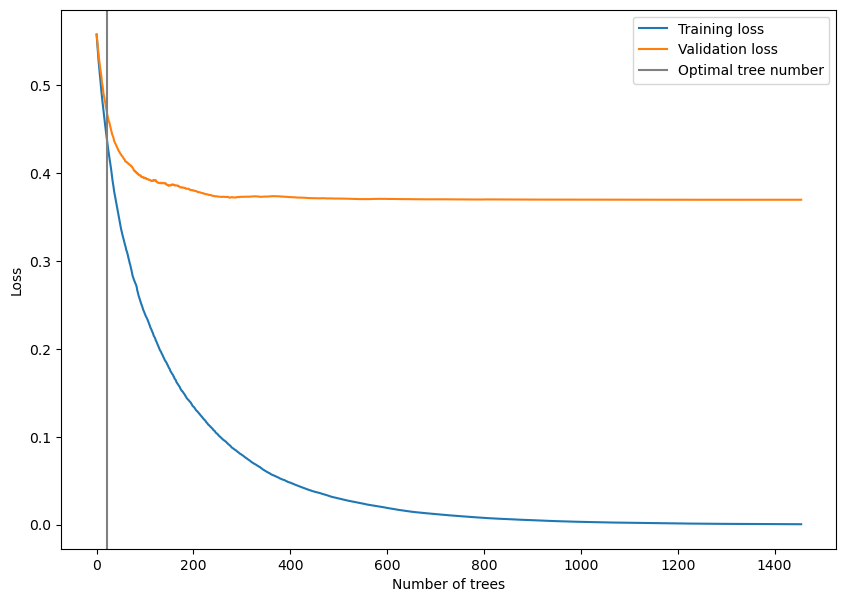

In [18]:
results = model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [19]:
model.best_ntree_limit

1256

In [20]:
preds = model.predict(test_x, ntree_limit=model.best_ntree_limit)
pred = np.round(preds, 0).astype(int)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [76]:
sub10['Y_Class']=pred
sub10.to_csv('./t30_XGBregressor_earlystopping_maxdepth12_learningrate003.csv', index=False)

In [77]:
sub10.describe()

,Y_Class
count,310.000000
mean,0.916129
std,0.340471
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [135]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)

model = xgb.XGBClassifier(n_estimators=200, 
                          max_depth=6, 
                          learning_rate=0.08, 
                          base_score = 1, 
                          reg_lambda = 5,
                         reg_alpha = 2,
                         colsample_bytree = 0.5)
model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_test, y_test)], 
            early_stopping_rounds=20) 

[0]	validation_0-mlogloss:1.03398	validation_1-mlogloss:1.04613
[1]	validation_0-mlogloss:0.97648	validation_1-mlogloss:1.00124
[2]	validation_0-mlogloss:0.92557	validation_1-mlogloss:0.96092
[3]	validation_0-mlogloss:0.87821	validation_1-mlogloss:0.92396
[4]	validation_0-mlogloss:0.83694	validation_1-mlogloss:0.89395
[5]	validation_0-mlogloss:0.80024	validation_1-mlogloss:0.86601
[6]	validation_0-mlogloss:0.76574	validation_1-mlogloss:0.84095
[7]	validation_0-mlogloss:0.73522	validation_1-mlogloss:0.81960
[8]	validation_0-mlogloss:0.70618	validation_1-mlogloss:0.80052
[9]	validation_0-mlogloss:0.67848	validation_1-mlogloss:0.78348
[10]	validation_0-mlogloss:0.65421	validation_1-mlogloss:0.76868
[11]	validation_0-mlogloss:0.63155	validation_1-mlogloss:0.75674
[12]	validation_0-mlogloss:0.61065	validation_1-mlogloss:0.74300
[13]	validation_0-mlogloss:0.58991	validation_1-mlogloss:0.73169
[14]	validation_0-mlogloss:0.57227	validation_1-mlogloss:0.72069
[15]	validation_0-mlogloss:0.55432	

XGBClassifier(base_score=1, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=2, ...)

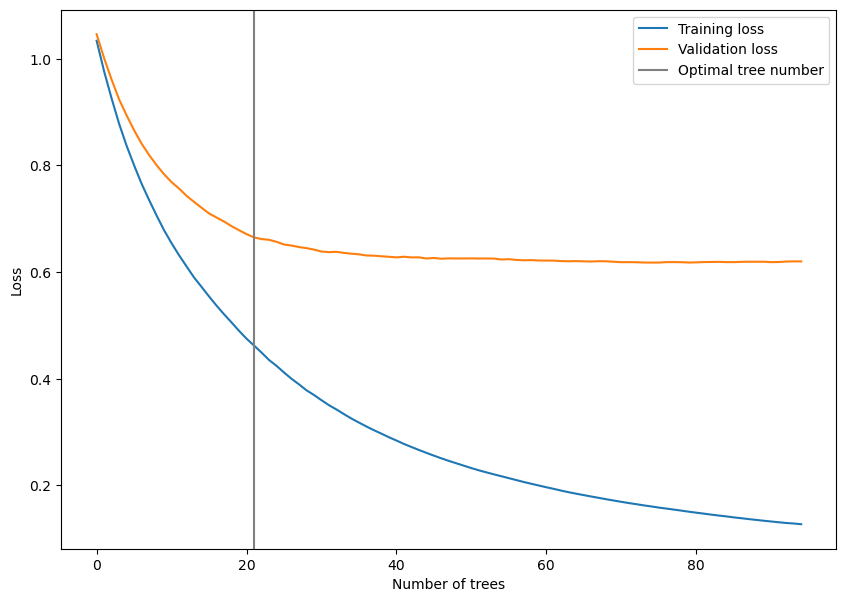

In [136]:
results = model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["mlogloss"], label="Training loss")
plt.plot(results["validation_1"]["mlogloss"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [137]:
model.best_ntree_limit

75

In [138]:
preds2 = model.predict(test_x, ntree_limit=model.best_ntree_limit)
pred2 = np.round(preds, 0).astype(int)
pred2

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1,
       0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [127]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1,
       0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [139]:
if (pred2 == pred).all():
    print('yes')

yes


In [40]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.3, 
                                                    stratify=train_y, 
                                                    random_state=37)

In [41]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [46]:
print('Accuracy:', round(accuracy_score(y_test, y_preds) * 100,2),'%')
print('f1-score:', round(f1_score(y_test, y_preds, average = 'macro') * 100,2),'%')

Accuracy: 76.11 %
f1-score: 59.49 %


In [49]:
model = XGBClassifier()

model.fit(X_train, 
          y_train, 
          eval_metric="merror", 
          eval_set=[(X_test, y_test)], 
          verbose=True)

[0]	validation_0-merror:0.26667
[1]	validation_0-merror:0.24444
[2]	validation_0-merror:0.26111
[3]	validation_0-merror:0.25000
[4]	validation_0-merror:0.24444
[5]	validation_0-merror:0.25556
[6]	validation_0-merror:0.24444
[7]	validation_0-merror:0.23889
[8]	validation_0-merror:0.23333
[9]	validation_0-merror:0.22778
[10]	validation_0-merror:0.22778
[11]	validation_0-merror:0.22778
[12]	validation_0-merror:0.22778
[13]	validation_0-merror:0.22778
[14]	validation_0-merror:0.22778
[15]	validation_0-merror:0.22778
[16]	validation_0-merror:0.22778
[17]	validation_0-merror:0.22222
[18]	validation_0-merror:0.22222
[19]	validation_0-merror:0.23333
[20]	validation_0-merror:0.22778
[21]	validation_0-merror:0.22222
[22]	validation_0-merror:0.22778
[23]	validation_0-merror:0.22778
[24]	validation_0-merror:0.22222
[25]	validation_0-merror:0.23333
[26]	validation_0-merror:0.22222
[27]	validation_0-merror:0.22222
[28]	validation_0-merror:0.21667
[29]	validation_0-merror:0.21111
[30]	validation_0-me

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [50]:
print('Accuracy:', round(accuracy_score(y_test, y_preds) * 100,2),'%')
print('f1-score:', round(f1_score(y_test, y_preds, average = 'macro') * 100,2),'%')

Accuracy: 76.11 %
f1-score: 59.49 %


# Randomsearch

1.XGB randomsearch

### XGB randomsearch

사이킷런 래퍼(randomsearch에 들어가 있는 것.)

learning rate, n_estimators, min_child_weight, min_split_loss, max_depth, reg_lambda, reg_alpha

In [149]:
param_distribs = {
#     'eta' : randint(low = 0.01, high = 0.1),
    'n_estimators': randint(low = 30, high = 200),
    'min_child_weight': randint(low = 1, high = 10),
    'min_split_loss': randint(low = 1, high = 10),
    'max_depth': randint(low = 1, high = 8),
     'reg_lambda' : randint(low = 1, high = 10),
    'reg_alpha' : randint(low = 1, high = 10)
}
start = time.time()
xgboost_r = XGBClassifier(seed=37).fit(train_x,train_y)
rand_cv = RandomizedSearchCV(xgboost_r, 
                            param_distributions=param_distribs,
                            cv = 5, 
                            n_iter = 50,
                            scoring = 'f1_macro',
                            n_jobs = -1,
                            verbose=3)
rand_cv.fit(train_x, train_y)
preds = rand_cv.predict(test_x)
end = time.time()
sub3['Y_Class'] = preds
sub3.to_csv('./t29_XGB_random.csv', index=False)

print(f'최적 하이퍼 파라미터: {rand_cv.best_params_}')
print(f'최고 예측 정확도: {(rand_cv.best_score_)*100:.4f}')
print(f'time elapsed: {end-start}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
최적 하이퍼 파라미터: {'max_depth': 5, 'min_child_weight': 5, 'min_split_loss': 1, 'n_estimators': 86, 'reg_alpha': 9, 'reg_lambda': 8}
최고 예측 정확도: 38.9714
time elapsed: 1420.115144252777
[CV 3/5] END max_depth=7, min_child_weight=4, min_split_loss=3, n_estimators=127, reg_alpha=8, reg_lambda=9;, score=0.411 total time= 1.2min
[CV 5/5] END max_depth=5, min_child_weight=5, min_split_loss=3, n_estimators=162, reg_alpha=2, reg_lambda=4;, score=0.327 total time= 1.3min
[CV 3/5] END max_depth=3, min_child_weight=2, min_split_loss=4, n_estimators=189, reg_alpha=6, reg_lambda=9;, score=0.403 total time=  55.3s
[CV 1/5] END max_depth=7, min_child_weight=3, min_split_loss=7, n_estimators=113, reg_alpha=2, reg_lambda=5;, score=0.331 total time= 1.1min
[CV 5/5] END max_depth=7, min_child_weight=3, min_split_loss=7, n_estimators=113, reg_alpha=2, reg_lambda=5;, score=0.308 total time= 1.1min
[CV 3/5] END max_depth=6, min_child_weight=7, min_split

[CV 3/5] END max_depth=2, min_child_weight=1, min_split_loss=9, n_estimators=80, reg_alpha=7, reg_lambda=4;, score=0.269 total time=  16.3s
[CV 5/5] END max_depth=2, min_child_weight=1, min_split_loss=9, n_estimators=80, reg_alpha=7, reg_lambda=4;, score=0.270 total time=  17.0s
[CV 4/5] END max_depth=1, min_child_weight=7, min_split_loss=5, n_estimators=110, reg_alpha=4, reg_lambda=7;, score=0.304 total time=  12.7s
[CV 2/5] END max_depth=5, min_child_weight=5, min_split_loss=3, n_estimators=162, reg_alpha=2, reg_lambda=4;, score=0.366 total time= 1.3min
[CV 3/5] END max_depth=5, min_child_weight=6, min_split_loss=6, n_estimators=171, reg_alpha=5, reg_lambda=6;, score=0.269 total time= 1.2min
[CV 2/5] END max_depth=6, min_child_weight=9, min_split_loss=8, n_estimators=180, reg_alpha=2, reg_lambda=2;, score=0.342 total time= 1.3min
[CV 1/5] END max_depth=5, min_child_weight=5, min_split_loss=4, n_estimators=141, reg_alpha=8, reg_lambda=1;, score=0.281 total time=  58.4s
[CV 2/5] END ma

[CV 2/5] END max_depth=7, min_child_weight=4, min_split_loss=3, n_estimators=127, reg_alpha=8, reg_lambda=9;, score=0.342 total time= 1.3min
[CV 2/5] END max_depth=5, min_child_weight=6, min_split_loss=7, n_estimators=55, reg_alpha=9, reg_lambda=6;, score=0.356 total time=  26.5s
[CV 5/5] END max_depth=5, min_child_weight=6, min_split_loss=7, n_estimators=55, reg_alpha=9, reg_lambda=6;, score=0.270 total time=  24.2s
[CV 1/5] END max_depth=3, min_child_weight=2, min_split_loss=4, n_estimators=189, reg_alpha=6, reg_lambda=9;, score=0.281 total time=  52.2s
[CV 5/5] END max_depth=3, min_child_weight=2, min_split_loss=4, n_estimators=189, reg_alpha=6, reg_lambda=9;, score=0.263 total time=  57.3s
[CV 3/5] END max_depth=7, min_child_weight=3, min_split_loss=7, n_estimators=113, reg_alpha=2, reg_lambda=5;, score=0.433 total time= 1.1min
[CV 5/5] END max_depth=5, min_child_weight=5, min_split_loss=4, n_estimators=141, reg_alpha=8, reg_lambda=1;, score=0.302 total time= 1.1min
[CV 3/5] END ma

[CV 1/5] END max_depth=2, min_child_weight=1, min_split_loss=9, n_estimators=80, reg_alpha=7, reg_lambda=4;, score=0.271 total time=  15.7s
[CV 4/5] END max_depth=2, min_child_weight=1, min_split_loss=9, n_estimators=80, reg_alpha=7, reg_lambda=4;, score=0.270 total time=  17.1s
[CV 3/5] END max_depth=1, min_child_weight=7, min_split_loss=5, n_estimators=110, reg_alpha=4, reg_lambda=7;, score=0.316 total time=  12.1s
[CV 1/5] END max_depth=5, min_child_weight=5, min_split_loss=3, n_estimators=162, reg_alpha=2, reg_lambda=4;, score=0.343 total time= 1.2min
[CV 2/5] END max_depth=5, min_child_weight=6, min_split_loss=6, n_estimators=171, reg_alpha=5, reg_lambda=6;, score=0.356 total time= 1.2min
[CV 1/5] END max_depth=6, min_child_weight=9, min_split_loss=8, n_estimators=180, reg_alpha=2, reg_lambda=2;, score=0.271 total time= 1.2min
[CV 4/5] END max_depth=7, min_child_weight=3, min_split_loss=7, n_estimators=113, reg_alpha=2, reg_lambda=5;, score=0.297 total time= 1.2min
[CV 4/5] END ma

In [150]:
sub3.describe()

,Y_Class
count,310.000000
mean,0.893548
std,0.329200
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [ ]:
xgboost_r = XGBClassifier(seed = 37, n_estimators = , eta = 0.01, max_depth = 8, alpha =, gamma = , max_dapth = 8, min_child_weight = , base_score = 1)
xgboost_r.fit(train_x, train_y)
preds = xgboost_r.predict(test_x, ntree_limit=xgboost_r.best_ntree_limit)
pred = np.round(preds, 0).astype(int)
sub2['Y_Class']=pred
sub2.to_csv('./t29_XGB_earlystopping_datapreprocessing_x_randomsearch.csv', index=False)

In [ ]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, 
                                                    test_size=0.2, 
                                                    stratify=train_y, 
                                                    random_state=37)

model = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_test, y_test)], 
            early_stopping_rounds=20) 

preds = model.predict(test_x, ntree_limit=model.best_ntree_limit)
pred = np.round(preds, 0).astype(int)

sub2['Y_Class']=pred
sub2.to_csv('./t29_XGB_earlystopping_datapreprocessing_x_po.csv', index=False)

In [ ]:
sub1.describe() #early stopping 블로그 보고

In [74]:
sub2.describe()# randomsearch+early stopping

,Y_Class
count,310.000000
mean,1.316129
std,0.571772
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000
